In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv("/content/drive/MyDrive/BTC_2019_2023_1d (1).csv")
data['datetime'] = pd.to_datetime(data['datetime'])

In [6]:
data.set_index('datetime', inplace=True)


In [7]:
prices = data['close'].values.reshape(-1, 1)

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1)) # normalising the data
scaled_data = scaler.fit_transform(prices)

In [14]:
def create_sequences(data, seq_length):
    sequences, targets = [], []
    for i in range(len(data) - seq_length):     #creating a sequence for using it in LSTM
        sequences.append(data[i:i + seq_length])
        targets.append(data[i + seq_length])
    return np.array(sequences), np.array(targets)


In [15]:
SEQ_LENGTH = 60

In [16]:
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size - SEQ_LENGTH:]

In [17]:
X_train, y_train = create_sequences(train_data, SEQ_LENGTH)
X_test, y_test = create_sequences(test_data, SEQ_LENGTH)

In [18]:
X_train = X_train.reshape((X_train.shape[0], SEQ_LENGTH, 1))
X_test = X_test.reshape((X_test.shape[0], SEQ_LENGTH, 1))

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(SEQ_LENGTH, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(1))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [21]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [22]:

model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 64ms/step - loss: 0.0647 - val_loss: 8.5528e-04
Epoch 2/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - loss: 0.0027 - val_loss: 6.9276e-04
Epoch 3/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0021 - val_loss: 6.6471e-04
Epoch 4/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - loss: 0.0023 - val_loss: 6.0289e-04
Epoch 5/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - loss: 0.0020 - val_loss: 6.0683e-04
Epoch 6/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0018 - val_loss: 6.3163e-04
Epoch 7/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 0.0017 - val_loss: 6.4954e-04
Epoch 8/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 0.0015 - val_loss: 4.7650e-04
Epoch 9/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 0.0013 - val_loss: 7.3917e-04
Epoch 10/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 0.0014 - val_loss: 4.8037e-04
Epoch 11/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - loss: 0.0016 - val_loss: 7.4469e-04
Epoch 12/20
38/38 ━

In [23]:
y_pred = model.predict(X_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step


In [24]:
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_rescaled = scaler.inverse_transform(y_pred)


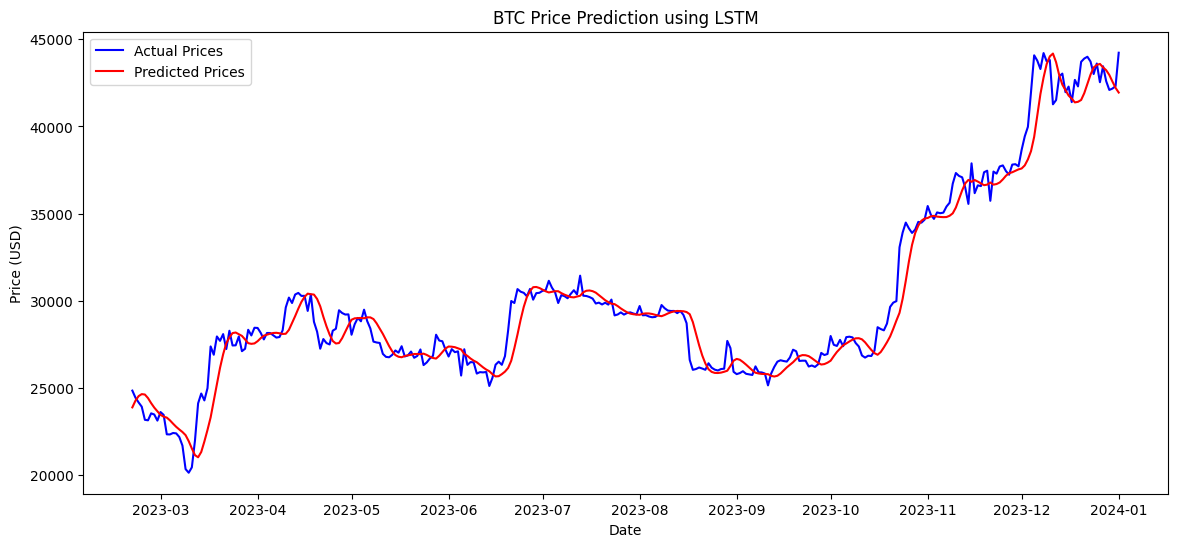

In [25]:
plt.figure(figsize=(14, 6))
plt.plot(data.index[-len(y_test):], y_test_rescaled, label='Actual Prices', color='blue')
plt.plot(data.index[-len(y_test):], y_pred_rescaled, label='Predicted Prices', color='red')
plt.title('BTC Price Prediction using LSTM')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()
